In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import scipy.stats as stats

In [30]:
infile = pd.read_csv("Dallas_Distances.csv")
df = pd.DataFrame(infile)

In [31]:
df.head(3)

,School Name,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Walking Distance (miles),Percent in Poverty,Zip Code,Poverty Groups
0,William M Anderson Elementary,Dallas,Fiesta Mart,"10121 E Lake June Rd, Dallas, TX 75217",1.4,1.4,1.2,97.13,75217,90-100
1,Arcadia Park Elementary School,Dallas,Supermercado Monterrey,"5306 W Davis St, Dallas, TX 75211",0.9,0.9,0.9,96.33,75211,90-100
2,"Jose ""Joe"" May Elementary School",Dallas,Fiesta Mart,"9727 Webb Chapel Rd, Dallas, TX 75220",1.7,1.7,1.3,96.24,75220,90-100


In [32]:
# df.groupby("Driving Distance (miles)").mean()

In [33]:
# df.sort_values(["Driving Distance (miles)"], ascending = False)

In [34]:
# df = df.drop(22)
# df.sort_values(["Driving Distance (miles)"], ascending = False)

In [35]:
df["Driving Distance (miles)"].mean()

1.44

In [36]:
# df.groupby("Percent in Poverty").agg({"Driving Distance (miles)": "mean", "Walking Distance (miles)": "mean"})

In [37]:
df["Poverty Groups"] = df["Percent in Poverty"].copy()

In [38]:
bin_labels = ["50-59", "60-69", "70-79", "80-89", "90-100"]
bins = [0, 59, 69, 79, 89, 100]

In [39]:
df["Poverty Groups"] = pd.cut(df["Poverty Groups"], bins, labels = bin_labels)

In [40]:
df.sort_values("Poverty Groups")

,School Name,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Walking Distance (miles),Percent in Poverty,Zip Code,Poverty Groups
101,Harry C. Withers Elementary School,Dallas,Sprouts Farmers Market,"11722 Marsh Ln #317, Dallas, TX 75229",1.1,0.9,0.9,55.20,75229,50-59
119,Eduardo Mata Elementary School,Dallas,Tom Thumb,"7331 Gaston Ave, Dallas, TX 75214",0.5,0.4,0.4,55.53,75214,50-59
88,Harry Stone Montessori,Dallas,Fiesta Mart,"3030 S Lancaster Rd, Dallas, TX 75216",1.9,2.3,1.9,58.70,75216,50-59
48,Kramer Elementary,Dallas,Tom Thumb,"11920 Preston Rd, Dallas, TX 75230",2.1,2.0,1.8,68.37,75230,60-69
34,Victor H Hexter Elementary School,Dallas,Kroger,"10677 E NW Hwy, Dallas, TX 75238",2.1,1.5,1.5,62.41,75218,60-69
22,Everette Lee DeGolyer Elementary School,Dallas,Aldi,"3128 Forest Ln #245, Dallas, TX 75234",1.2,1.0,1.0,63.86,75229,60-69
52,Geneva Heights Elementary School,Dallas,Trader Joe's,"2001 Greenville Ave, Dallas, TX 75206",1.0,1.0,1.0,70.75,75206,70-79
105,Birdie Alexander Elementary,Dallas,Aldi,"8034 Chrysalis Dr, Dallas, TX 75237",1.2,1.4,1.2,77.54,75232,70-79
81,Rosemont Elementary School,Dallas,Tom Thumb,"315 S Hampton Rd, Dallas, TX 75208",1.3,1.3,1.3,75.33,75208,70-79
128,Jerry R. Junkins Elementary School,Dallas,Albertsons,"2150 N Josey Ln, Carrollton, TX 75006",2.5,2.5,2.3,74.47,75006,70-79


In [41]:
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().sort_values(ascending = False)

Poverty Groups
60-69     1.800000
80-89     1.625000
70-79     1.400000
90-100    1.397087
50-59     1.166667
Name: Driving Distance (miles), dtype: float64

In [42]:
# df = df.drop(23)

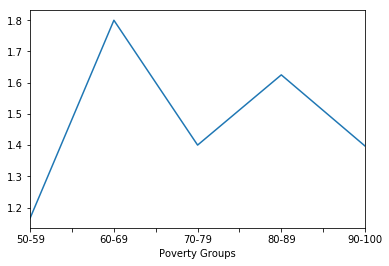

In [43]:
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().plot()

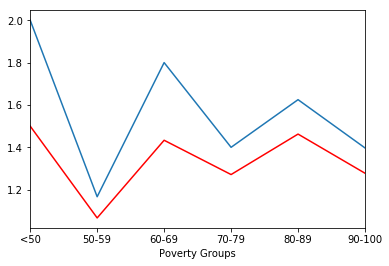

In [72]:
df.groupby("Poverty Groups")["Walking Distance (miles)"].mean().plot(c = "red")
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().plot()

In [73]:
df.groupby("Poverty Groups")["Walking Distance (miles)"].mean().sort_values(ascending = False)

Poverty Groups
<50       1.500000
80-89     1.462500
60-69     1.433333
90-100    1.277670
70-79     1.271429
50-59     1.066667
Name: Walking Distance (miles), dtype: float64

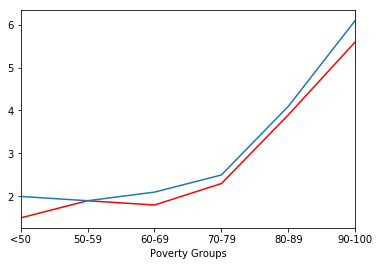

In [74]:
df.groupby("Poverty Groups")["Walking Distance (miles)"].max().plot(c = "red")
df.groupby("Poverty Groups")["Driving Distance (miles)"].max().plot()

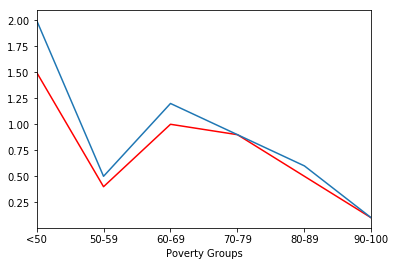

In [75]:
df.groupby("Poverty Groups")["Walking Distance (miles)"].min().plot(c = "red")
df.groupby("Poverty Groups")["Driving Distance (miles)"].min().plot()

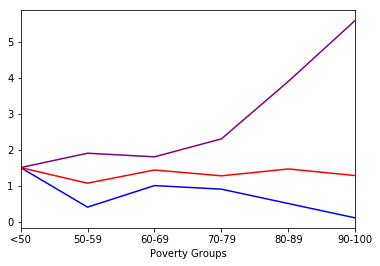

In [76]:
df.groupby("Poverty Groups")["Walking Distance (miles)"].max().plot(c = "purple")
df.groupby("Poverty Groups")["Walking Distance (miles)"].min().plot(c = "blue")
df.groupby("Poverty Groups")["Walking Distance (miles)"].mean().plot(c = "red")

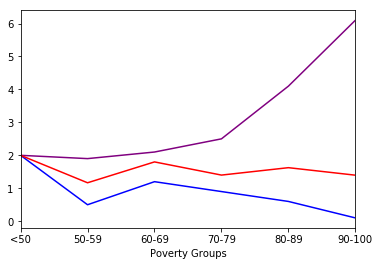

In [77]:
df.groupby("Poverty Groups")["Driving Distance (miles)"].max().plot(c = "purple")
df.groupby("Poverty Groups")["Driving Distance (miles)"].min().plot(c = "blue")
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().plot(c = "red")

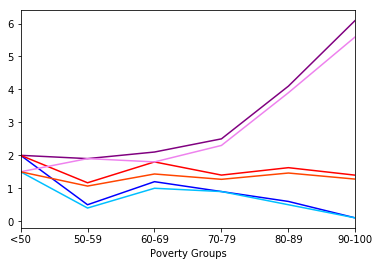

In [78]:
# Driving distance in purple (max), red (mean), and blue (min)
df.groupby("Poverty Groups")["Driving Distance (miles)"].max().plot(c = "purple")
df.groupby("Poverty Groups")["Driving Distance (miles)"].min().plot(c = "blue")
df.groupby("Poverty Groups")["Driving Distance (miles)"].mean().plot(c = "red")

# Walking distance using lighter versions of purple, red, and blue
df.groupby("Poverty Groups")["Walking Distance (miles)"].max().plot(c = "violet")
df.groupby("Poverty Groups")["Walking Distance (miles)"].min().plot(c = "deepskyblue")
df.groupby("Poverty Groups")["Walking Distance (miles)"].mean().plot(c = "orangered")

In [42]:
df["Percent in Poverty"].mean()

89.99000000000001

In [43]:
df["Percent in Poverty"].min()

32.95

In [48]:
df.sort_values("Percent in Poverty")
df.drop(23)
df["Percent in Poverty"].mean()

89.99000000000001

In [79]:
# df.count("")

In [27]:
df.head()

,School Name,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Walking Distance (miles),Percent in Poverty,Zip Code,Poverty Groups
0,William M Anderson Elementary,Dallas,Fiesta Mart,"10121 E Lake June Rd, Dallas, TX 75217",1.4,1.4,1.2,97.13,75217,90-100
1,Arcadia Park Elementary School,Dallas,Supermercado Monterrey,"5306 W Davis St, Dallas, TX 75211",0.9,0.9,0.9,96.33,75211,90-100
2,"Jose ""Joe"" May Elementary School",Dallas,Fiesta Mart,"9727 Webb Chapel Rd, Dallas, TX 75220",1.7,1.7,1.3,96.24,75220,90-100
3,Bayles Elementary School,Dallas,Walmart Supercenter,"7401 Samuell Blvd, Dallas, TX 75228",1.5,1.5,1.4,98.00,75228,90-100
4,W A Blair Elementary School,Dallas,Fiesta Mart,"2951 S Buckner Blvd, Dallas, TX 75227",4.1,4.6,3.9,86.67,75217,80-89


In [44]:
df.to_csv("Dallas_Distances.csv", index = False)

In [53]:
df["Poverty Groups"].count()

140

In [55]:
df.head(2)

,School Name,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Walking Distance (miles),Percent in Poverty,Zip Code,Poverty Groups
0,William M Anderson Elementary,Dallas,Fiesta Mart,"10121 E Lake June Rd, Dallas, TX 75217",1.4,1.4,1.2,97.13,75217,90-100
1,Arcadia Park Elementary School,Dallas,Supermercado Monterrey,"5306 W Davis St, Dallas, TX 75211",0.9,0.9,0.9,96.33,75211,90-100


In [56]:
infile = pd.read_csv("Austin_Distances.csv")
AustinDF = pd.DataFrame(infile)

In [57]:
AustinDF.head(2)

,School,Location,Closest Store,Store Address,Driving Distance (miles),Bus Distance (miles),Percent in Poverty,Zip Code,Poverty Groups
0,Allison Elementary,Austin,H-E-B,"2110 W Slaughter Ln, Austin",1.0,1.3,92.00,78748,90-100
1,Andrews Elementary School,Austin,H-E-B,"7112 Ed Bluestein Blvd #125, Austin",1.2,1.6,91.02,78723,90-100


In [58]:
infile = pd.read_csv("Laredo_Distance.csv")
LaredoDF = pd.DataFrame(infile)

In [59]:
LaredoDF.head(2)

,School Name,Location,Store Name,Address,Driving Distance (miles),Bus Distance (miles),Percent in Poverty,Zip Code
0,Antonio M. Bruni Elementary School,Laredo,Los Perez Meat Market,601 Park St,0.3,NaN,100.0,NaN
1,Christopher M. Macdonell Elementary School,Laredo,Laredo Organic Foods & Vitamin,611 Salinas Ave,0.7,NaN,100.0,NaN


In [71]:
LaredoDF = LaredoDF.rename(columns = {"Store Name": "Closest Store", "Address": "Store Address"})

In [64]:
AustinDF = AustinDF.rename(columns = {"School": "School Name"})

In [72]:
all_cities = df

In [73]:
all_cities = all_cities.append(AustinDF)

/Applications/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [74]:
all_cities = all_cities.append(LaredoDF)

In [75]:
all_cities.count()

Bus Distance (miles)        200
Closest Store               220
Driving Distance (miles)    220
Location                    220
Percent in Poverty          220
Poverty Groups              200
School Name                 220
Store Address               220
Walking Distance (miles)    140
Zip Code                    200
dtype: int64

In [77]:
all_cities = all_cities.reset_index()

In [79]:
all_cities.rename(columns = {"index": "number"})

,number,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code
0,0,1.4,Fiesta Mart,1.40,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0
1,1,0.9,Supermercado Monterrey,0.90,Dallas,96.33,90-100,Arcadia Park Elementary School,"5306 W Davis St, Dallas, TX 75211",0.9,75211.0
2,2,1.7,Fiesta Mart,1.70,Dallas,96.24,90-100,"Jose ""Joe"" May Elementary School","9727 Webb Chapel Rd, Dallas, TX 75220",1.3,75220.0
3,3,1.5,Walmart Supercenter,1.50,Dallas,98.00,90-100,Bayles Elementary School,"7401 Samuell Blvd, Dallas, TX 75228",1.4,75228.0
4,4,4.6,Fiesta Mart,4.10,Dallas,86.67,80-89,W A Blair Elementary School,"2951 S Buckner Blvd, Dallas, TX 75227",3.9,75217.0
5,5,2.2,Aldi,1.60,Dallas,91.71,90-100,Annie Webb Blanton Elementary School,"2926 S Buckner Blvd, Dallas, TX 75227",1.6,75227.0
6,6,1.6,Fiesta Mart,1.50,Dallas,97.38,90-100,James Bowie Elementary School,"611 W Jefferson Blvd, Dallas, TX 75208",1.4,75203.0
7,7,1.3,Fiesta Mart,0.60,Dallas,88.86,80-89,John Neely Bryan Elementary School,"3030 S Lancaster Rd, Dallas, TX 75216",0.6,75216.0
8,8,0.9,Save A Lot,0.90,Dallas,70.11,70-79,Harrell Budd Elementary School,"2611 S Lancaster Rd, Dallas, TX 75216",0.9,75216.0
9,9,1.0,Fiesta Mart,0.80,Dallas,98.76,90-100,David G. Burnet Elementary School,"9727 Webb Chapel Rd, Dallas, TX 75220",0.7,75220.0


In [81]:
all_cities = all_cities.drop("index", axis = 1)

In [82]:
all_cities

,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code
0,1.4,Fiesta Mart,1.40,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0
1,0.9,Supermercado Monterrey,0.90,Dallas,96.33,90-100,Arcadia Park Elementary School,"5306 W Davis St, Dallas, TX 75211",0.9,75211.0
2,1.7,Fiesta Mart,1.70,Dallas,96.24,90-100,"Jose ""Joe"" May Elementary School","9727 Webb Chapel Rd, Dallas, TX 75220",1.3,75220.0
3,1.5,Walmart Supercenter,1.50,Dallas,98.00,90-100,Bayles Elementary School,"7401 Samuell Blvd, Dallas, TX 75228",1.4,75228.0
4,4.6,Fiesta Mart,4.10,Dallas,86.67,80-89,W A Blair Elementary School,"2951 S Buckner Blvd, Dallas, TX 75227",3.9,75217.0
5,2.2,Aldi,1.60,Dallas,91.71,90-100,Annie Webb Blanton Elementary School,"2926 S Buckner Blvd, Dallas, TX 75227",1.6,75227.0
6,1.6,Fiesta Mart,1.50,Dallas,97.38,90-100,James Bowie Elementary School,"611 W Jefferson Blvd, Dallas, TX 75208",1.4,75203.0
7,1.3,Fiesta Mart,0.60,Dallas,88.86,80-89,John Neely Bryan Elementary School,"3030 S Lancaster Rd, Dallas, TX 75216",0.6,75216.0
8,0.9,Save A Lot,0.90,Dallas,70.11,70-79,Harrell Budd Elementary School,"2611 S Lancaster Rd, Dallas, TX 75216",0.9,75216.0
9,1.0,Fiesta Mart,0.80,Dallas,98.76,90-100,David G. Burnet Elementary School,"9727 Webb Chapel Rd, Dallas, TX 75220",0.7,75220.0


In [83]:
all_cities.to_csv("Combined_Cities.csv", index = False)